In [44]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# import dask.dataframe as dd
# from mpl_interactions import ioff, panhandler, zoom_factory

import re


In [103]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
# ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')

file = "../data/PressureStudy/ATPC_0nubb_1bar.h5"

# file = "../data/PressureStudy/ATPC_0nubb_1bar.h5"
# file = "../data/PressureStudy/ATPC_gamma.h5"

file = "../config/ATPC_Bi.h5"

event = 9803


hits = pd.read_hdf(file, 'MC/hits')
display(hits)
print(len(hits.event_id.unique()))

event_hits = hits[hits.event_id == event]

# parts = pd.read_hdf(file, 'parts')
# event_parts = parts[parts.event_id == event]
# display(event_parts)

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,9800,-485.665619,2395.962646,108.358597,9.850623,0.000197,GAS,1,0
1,9800,-485.665649,2395.961914,108.358627,9.850903,0.000021,GAS,14,0
2,9800,-485.666687,2395.962646,108.358734,9.851012,0.000023,GAS,13,0
3,9800,-485.664551,2395.962891,108.358696,9.850895,0.000047,GAS,12,0
4,9800,-485.664948,2395.962646,108.358749,9.850802,0.000045,GAS,11,0
...,...,...,...,...,...,...,...,...,...
9929682,11590,-1349.882446,1453.852783,-869.271973,1.978358,0.000660,GAS,49,0
9929683,11590,-1349.879883,1453.856079,-869.273804,1.978626,0.000061,GAS,49,1
9929684,11590,-1349.878418,1453.853638,-869.276978,1.978884,0.000252,GAS,49,2
9929685,11590,-1349.876221,1453.854614,-869.278503,1.979096,0.000277,GAS,49,3


1791


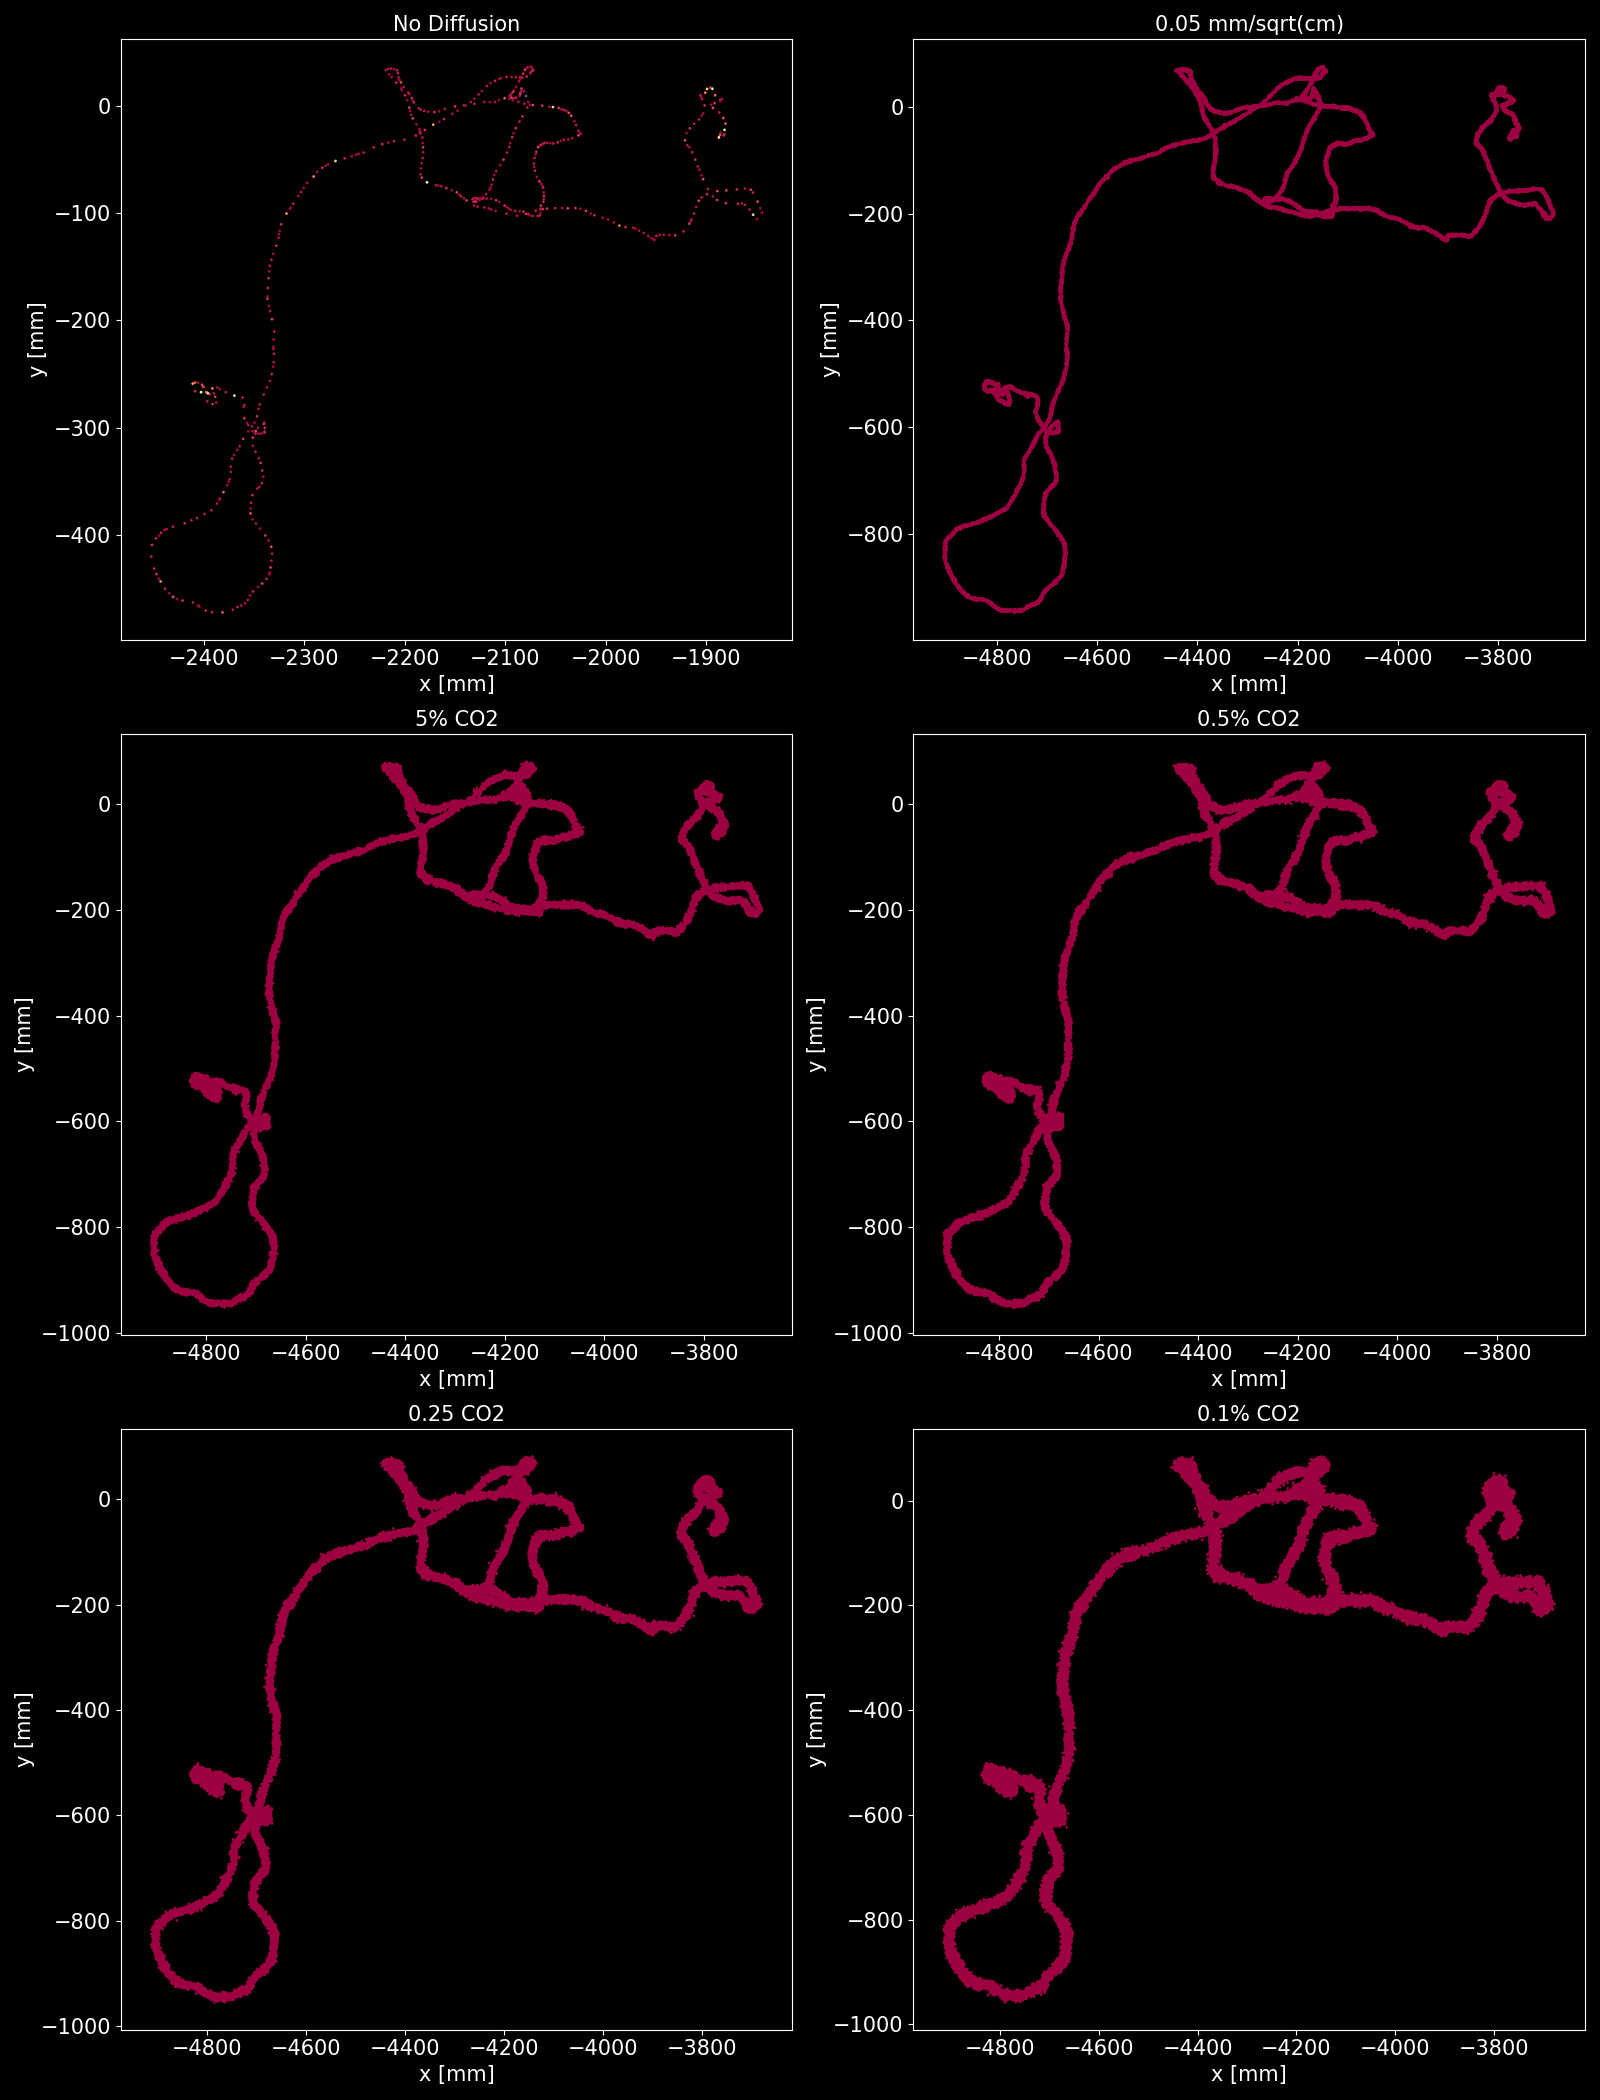

In [116]:
# Make a 3D view of the track
%matplotlib widget

def PlotEvent(axis, file_, title, eid):

    hits = pd.read_hdf(file_, 'MC/hits')
    event_hits = hits[hits.event_id == eid]

    # Create 3D axes
    ax = fig.add_subplot(axis)

    fig.set_facecolor('black')
    ax.set_facecolor('black')
    # ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
    ax.scatter(event_hits.x, event_hits.y,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15)
    ax.set_ylabel("y [mm]", fontsize = 15)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Set the color of the spines (borders) to white
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.set_title(title, fontsize = 15, color='white')

    fig.tight_layout()

fig  = plt.figure(figsize=(16, 7*3))

eid = 502

# PlotEvent(321, "../data/PressureStudy/ATPC_0nubb_1bar_smear.h5", eid)
# PlotEvent(322, "../data/PressureStudy/ATPC_0nubb_1bar_0.05percent_smear.h5", eid)
# PlotEvent(323, "../data/PressureStudy/ATPC_0nubb_1bar_5.0percent_smear.h5", eid)
# PlotEvent(324, "../data/PressureStudy/ATPC_0nubb_1bar_0.25percent_smear.h5", eid)
# PlotEvent(325, "../data/PressureStudy/ATPC_0nubb_1bar_0.1percent_smear.h5", eid)


PlotEvent(321, "../data/ATPC_0nubb/ATPC_0nubb_smear.h5", "No Diffusion", eid)
PlotEvent(322, "../data/ATPC_0nubb/ATPC_0nubb_0.05percent_smear.h5", "0.05 mm/sqrt(cm)", eid)
PlotEvent(323, "../data/ATPC_0nubb/ATPC_0nubb_5.0percent_smear.h5", "5% CO2", eid)
PlotEvent(324, "../data/ATPC_0nubb/ATPC_0nubb_0.5percent_smear.h5", "0.5% CO2", eid)
PlotEvent(325, "../data/ATPC_0nubb/ATPC_0nubb_0.25percent_smear.h5", "0.25 CO2", eid)
PlotEvent(326, "../data/ATPC_0nubb/ATPC_0nubb_0.1percent_smear.h5", "0.1% CO2", eid)

plt.savefig("plots/diffusion_amounts.png", dpi = 300)


In [47]:
%matplotlib widget



# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_y, event_parts[event_parts.primary==1].initial_z+3000, s=50)

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)

NameError: name 'zoom_factory' is not defined